In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

from prediction.data import vessel_groups
from prediction.preprocessing import load_and_build, remove_outliers_parallel
from prediction.visualization import plot_north_america, plot_trajectories
from prediction.preprocessing import remove_outliers
from prediction.preprocessing import validate_lengths


In [2]:
groups = vessel_groups()
trajectories = load_and_build(datetime(2024, 1, 1), datetime(2024, 1, 1), 100, groups, verbose=True)

Loading and building trajectories for 1 days using 31 processes
Loading existing data for 2024-01-01 00:00:00


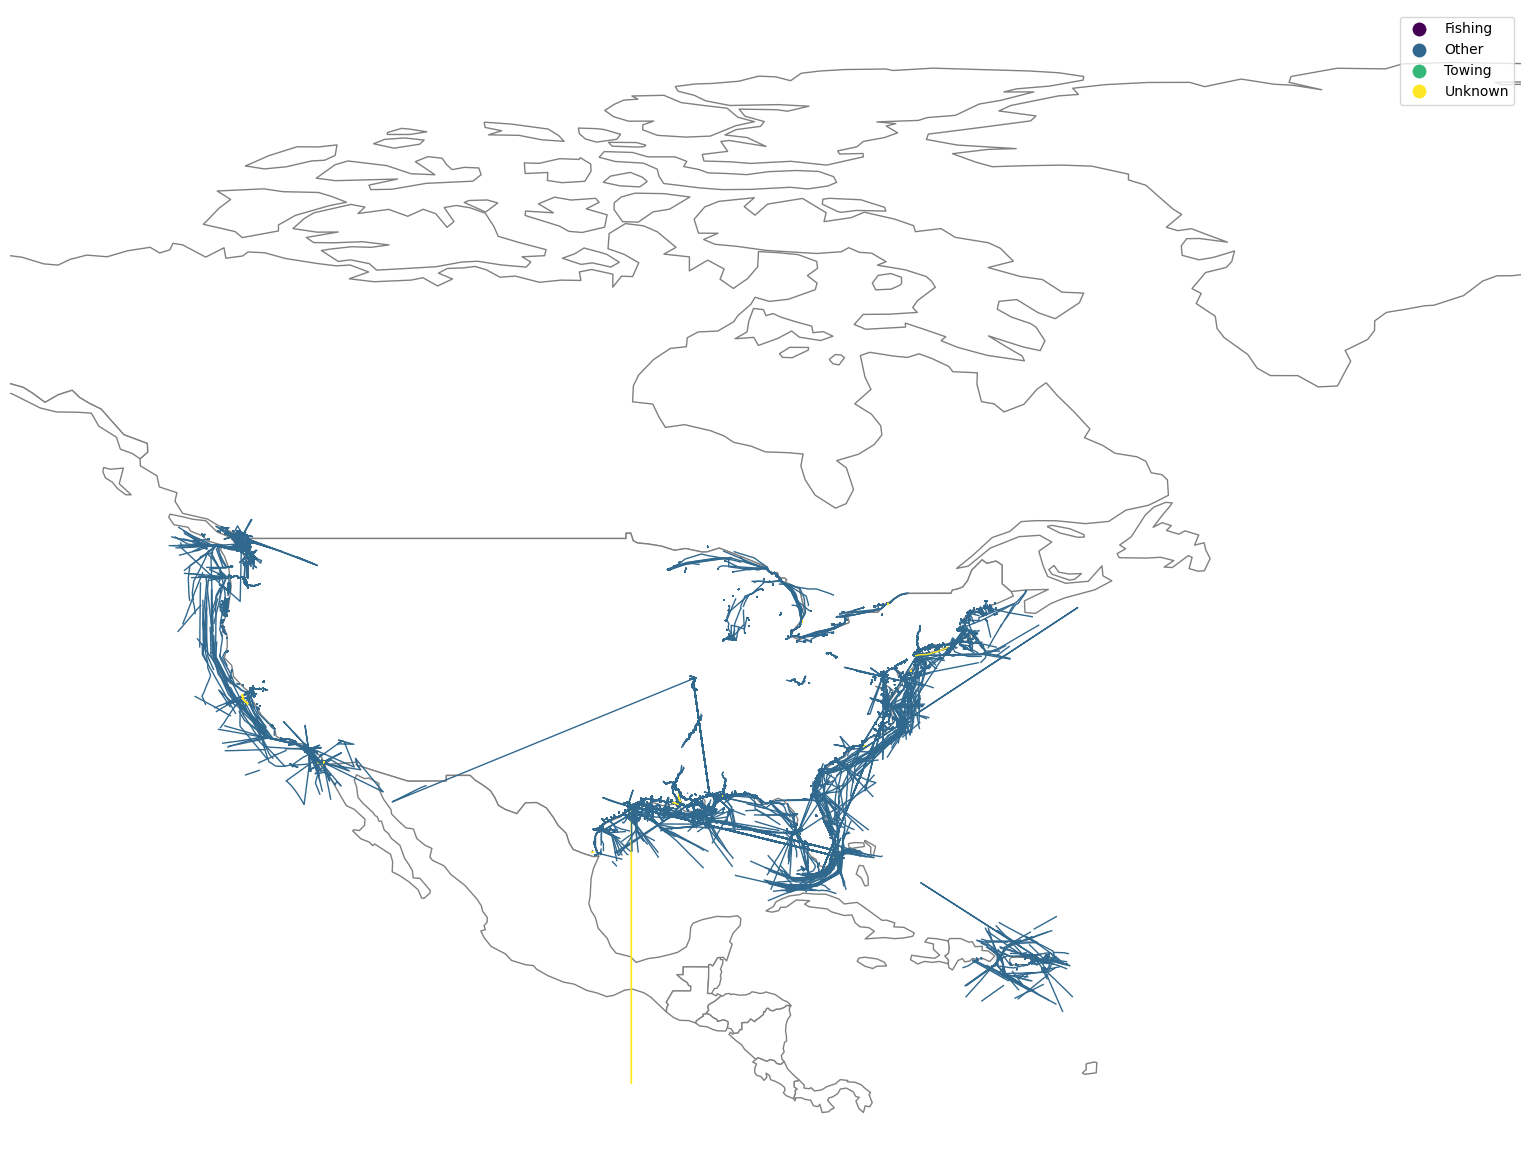

In [3]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()

In [4]:
trajectories_new = trajectories.copy()

In [5]:

#trajectories_new = remove_outliers_parallel(trajectories_new, threshold_partition=5.0, threshold_association=15.0, threshold_completeness=100.0)

trajectories_new = remove_outliers(trajectories_new, threshold_partition=5.0, threshold_association=15.0, threshold_completeness=100.0)


100%|██████████| 12070/12070 [03:25<00:00, 58.77it/s]


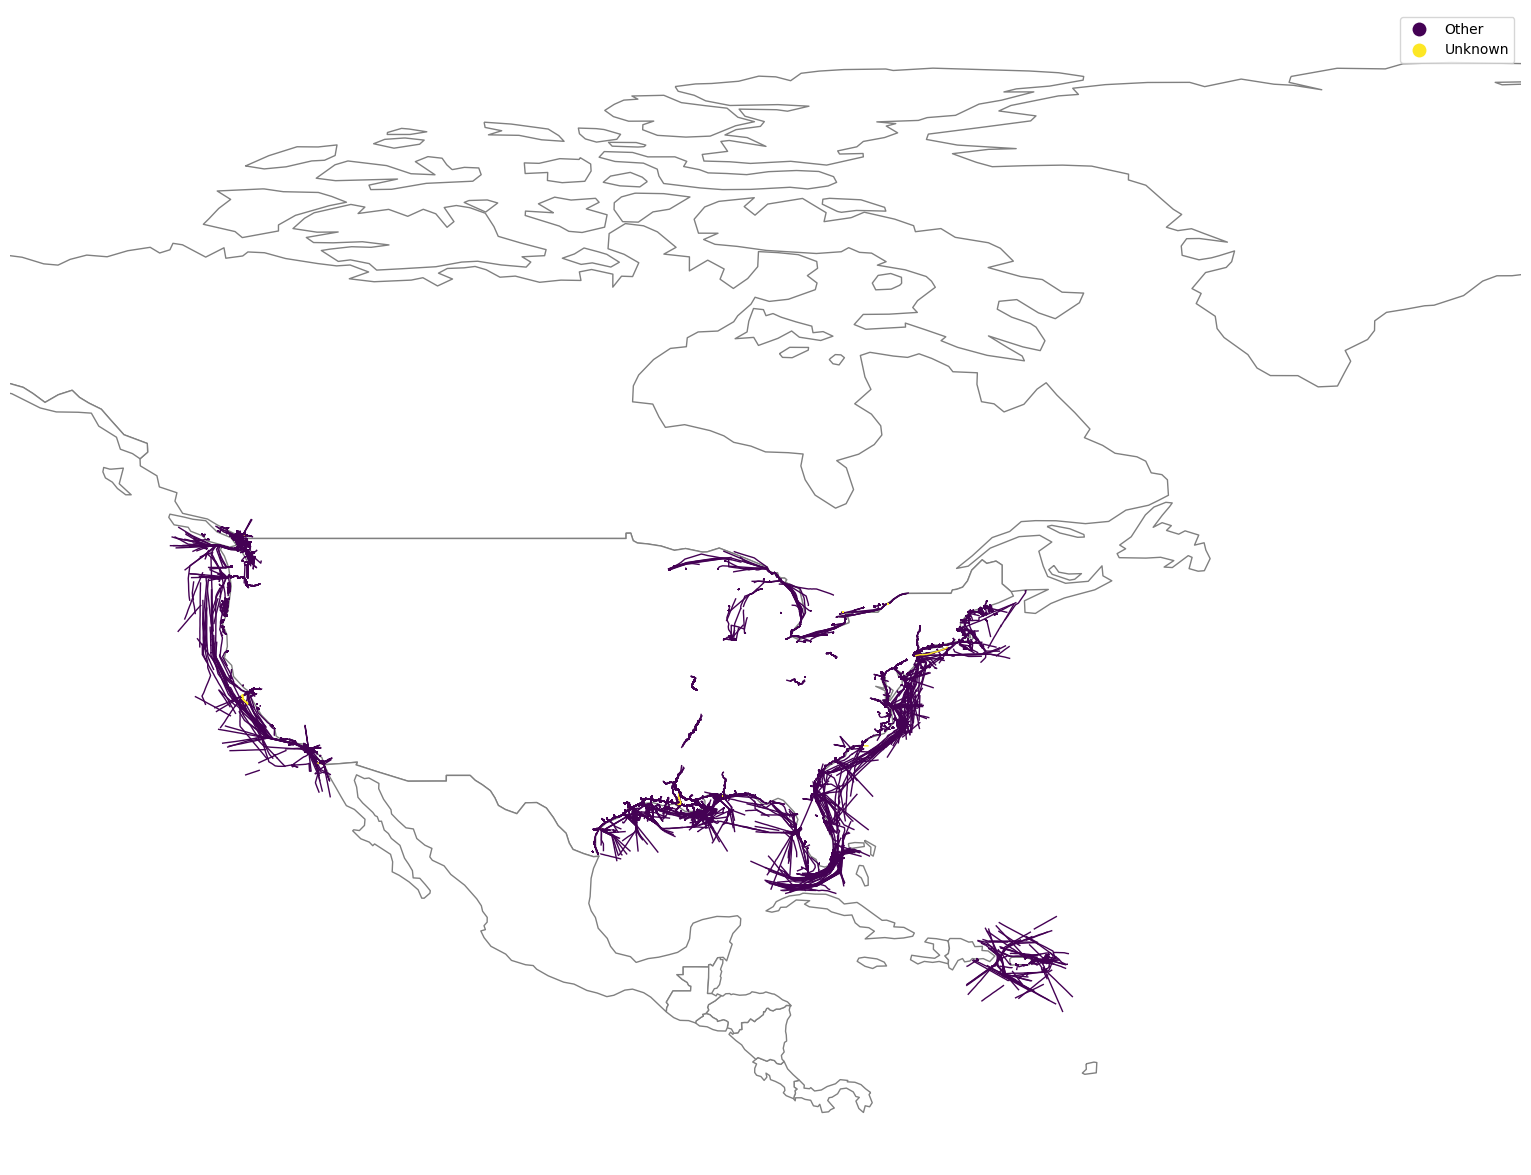

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories_new, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()